# Importation du fichier CSV et des packages + Mise en lien avec Pycharm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import numpy as np; np.random.seed(42)
print("Setup Complete")

Setup Complete


In [2]:
df = pd.read_csv("/home/apprenant/Downloads/recommandation.tsv", sep='\t', low_memory=False)

# Création de mon DataFrame

In [3]:
#Je sélectionne les colonnes qui me semblent essentielles pour le nutri_score et je crée un dataframe indépendant pour passer au nettoyage et au traitement de ma data.
df_nutri_score = df[['product_name', 'energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr', 'countries_en']]

In [4]:
#Je renomme mes colonnes
df_nutri_score = df_nutri_score.rename(columns={'energy_100g': 'energy', 'sugars_100g': 'sugar', 'fiber_100g': 'fiber','proteins_100g': 'protein', 'sodium_100g': 'sodium', 'saturated-fat_100g': 'saturated_fat', 'nutrition-score-fr_100g': 'nutrition_score', 'nutrition_grade_fr': 'nutrition_echelon', 'countries_en': 'distribution' })

# Sélection de la France comme pays principal

In [5]:
#test = df_nutri_score[df_nutri_score.distribution ]
#df_nutri_score[df_nutri_score.distribution] = df_nutri_score[df_nutri_score.distribution == 'France']
#print(df_nutri_score.head())

df_nutri_score_fr = df_nutri_score[df_nutri_score.distribution == 'France']


# MISSING DATA VISUALIZATION

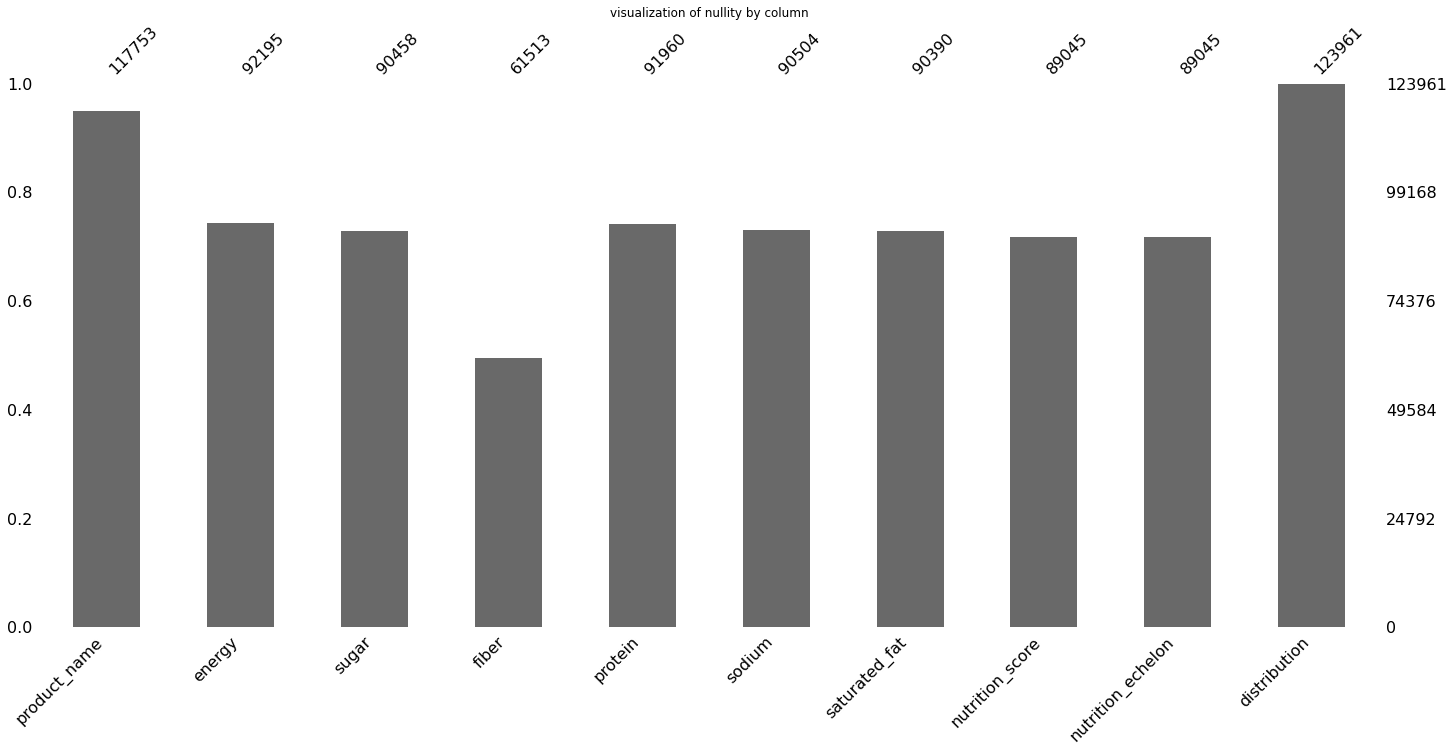

In [6]:
msno.bar(df_nutri_score_fr);
plt.title("visualization of nullity by column");


Pourcentage de données présentes par colonne

In [7]:

percentage_per_column_notmissing_value = ((df_nutri_score_fr.isnull().sum() * 100 / len(df_nutri_score_fr)) - 100).abs()
print(percentage_per_column_notmissing_value)



product_name          94.991973
energy                74.374198
sugar                 72.972951
fiber                 49.622865
protein               74.184623
sodium                73.010060
saturated_fat         72.918095
nutrition_score       71.833077
nutrition_echelon     71.833077
distribution         100.000000
dtype: float64


Pourcentage de données manquantes par colonne

In [8]:
percentage_per_column_missing_value = df_nutri_score_fr.isnull().sum() * 100 / len(df_nutri_score_fr)
print(percentage_per_column_missing_value)


product_name          5.008027
energy               25.625802
sugar                27.027049
fiber                50.377135
protein              25.815377
sodium               26.989940
saturated_fat        27.081905
nutrition_score      28.166923
nutrition_echelon    28.166923
distribution          0.000000
dtype: float64


Visualiser le pourcentage de valeurs manquantes face à l'ensemble des valeurs:

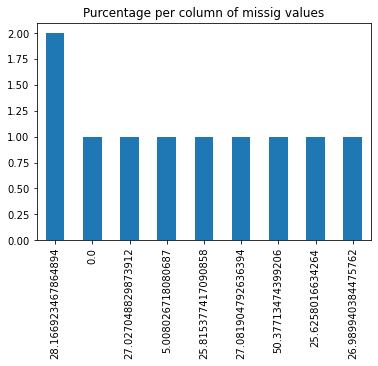

In [9]:
percentage_per_column_missing_value.value_counts().plot(kind='bar');
plt.title("Purcentage per column of missig values");

Visualiser le pourcentage de valeurs non manquantes face à l'ensemble des valeurs pour comparer:

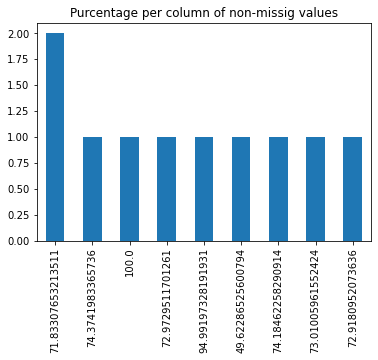

In [10]:
percentage_per_column_notmissing_value.value_counts().plot(kind='bar');
plt.title("Purcentage per column of non-missig values");


# Cleaning valeurs manquantes

Je supprime les produits manquants:

In [11]:
df_nutri_score_fr=df_nutri_score_fr.dropna(subset = ['product_name'])
print(df_nutri_score_fr.isnull().sum())

product_name             0
energy               25919
sugar                27647
fiber                56435
protein              26153
sodium               27604
saturated_fat        27711
nutrition_score      29051
nutrition_echelon    29051
distribution             0
dtype: int64


Visualiser le tableau dans son ensemble

In [12]:
df_nutri_score_fr

,product_name,energy,sugar,fiber,protein,sodium,saturated_fat,nutrition_score,nutrition_echelon,distribution
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
46,Naturablue original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
47,Filet de bœuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
51,Naturakrill original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
138,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
...,...,...,...,...,...,...,...,...,...,...
356017,Thé vert Earl grey,21.0,0.5,0.2,0.5,0.01,0.2,NaN,NaN,France
356018,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
356019,Rillette d'oie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
356024,Biscottes bio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France


Je supprime les lignes où l'ensemble des colonnes hors celle de product_name sont vides

In [13]:
df_nutri_score_fr = df_nutri_score_fr.dropna(axis=0, subset=['energy', 'sugar', 'fiber', 'sodium', 'protein', 'saturated_fat'])

Il existe dans la db beaucoup de valeurs manquantes. 
J'ai supprimé les noms des produits manquants pour ne pas avoir de données oprhelines. 
Je vais traiter les valeurs nulles de l'energie, fibres, proteins etc.
Pour ces colonnes, je ne peux pas me permettre de dupliquer la valeur d'à côté ou de supprimer la ligne en entier.
La meilleure solution me semble être celle de remplacer la valeur manquante par 0.
Après avoir regardé plusieurs produits, il me semble plus probable que NaN équivaut 
à une valeur nulle soit 0 et n'est pas un manque d'informations. 
exemple: Real Salt Granular 	NaN 	NaN 	NaN 	NaN 	37.857 	NaN 	NaN 	NaN

In [51]:
#Je remplace les données nulles de la colonne sucre par 0
df_nutri_score_fr['sugar'] = df_nutri_score_fr['sugar'].fillna(0)

In [52]:
#Je remplace les données nulles de la colonne energy par 0
df_nutri_score_fr['energy'] = df_nutri_score_fr['energy'].fillna(0)

In [53]:
#Je remplace les données nulles de la colonne fiber par 0
df_nutri_score_fr['fiber'] = df_nutri_score_fr['fiber'].fillna(0)

In [54]:
#Je remplace les données nulles de la colonne protein par 0
df_nutri_score_fr['protein'] = df_nutri_score_fr['protein'].fillna(0)

In [55]:
#Je remplace les données nulles de la colonne sodium par 0
df_nutri_score_fr['sodium'] = df_nutri_score_fr['sodium'].fillna(0)

In [56]:
#Je remplace les données nulles de la colonne saturated_fat par 0
df_nutri_score_fr['saturated_fat'] = df_nutri_score_fr['saturated_fat'].fillna(0)

In [20]:
#Je regarde ma quantité de data
df_nutri_score_fr.shape

(60781, 10)

In [21]:
#Je regarde mes 10 premières lignes
df_nutri_score_fr

,product_name,energy,sugar,fiber,protein,sodium,saturated_fat,nutrition_score,nutrition_echelon,distribution
185,Root Beer,215.0,13.60,0.0,0.00,0.024200,0.00,18.0,e,France
193,Preparation mug cake chocolat-caramel au beurr...,1632.0,42.00,0.0,7.00,0.383858,4.50,21.0,e,France
194,Mini Confettis,1753.0,87.70,0.9,0.60,0.003937,0.80,14.0,d,France
195,Praliné Amande Et Noisette,2406.0,50.30,3.9,9.50,0.001181,2.90,14.0,d,France
231,"Pepsi, Nouveau goût !",177.0,10.40,0.0,0.00,0.010000,0.00,13.0,e,France
...,...,...,...,...,...,...,...,...,...,...
355981,"Biscuits aux céréales, aux pépites de chocolat...",2008.0,27.00,5.0,8.00,0.110236,9.00,14.0,d,France
355982,Neszt Cochon Con,837.0,3.00,99.0,7.00,30.708661,99.00,17.0,d,France
356005,Tartines craquantes bio au sarrasin,1643.0,2.60,5.9,13.00,0.267717,0.60,-4.0,a,France
356010,Amandes,2406.0,3.89,12.2,21.22,0.039370,3.73,0.0,b,France


# LIEN ENTRE NUTRISCORE ET ECHELON GRADE 

In [22]:
#le lien entre nutri_core et nutrition_echelon(grade) est évident du fait du même nombre de valeurs manquantes
print(df_nutri_score_fr['nutrition_score'].isnull().sum())
print(df_nutri_score_fr['nutrition_echelon'].isnull().sum())

592
592


# Je traite les valeurs manquantes de nutriscore et Echelon grade / Nutri score vide / Nutri score Grade vide

In [58]:
#Je remplace les données nulles de la colonne nutrition echelon par 'undefined' pour ne pas induire dans l'erreur l'utilisateur avec 0
df_nutri_score_fr['nutrition_echelon'] = df_nutri_score_fr['nutrition_echelon'].fillna('undefined')
print(df_nutri_score_fr['nutrition_echelon'].isnull().sum())

0


In [24]:
#éléments le plus fréquent par colonne
print(df_nutri_score_fr.mode())

  product_name  energy  sugar  fiber  protein  sodium  saturated_fat  \
0    Spaghetti     0.0    0.0    0.0      0.0     0.0            0.0   

   nutrition_score nutrition_echelon distribution  
0              0.0                 d       France  


In [25]:
df_nutri_score_limit = df_nutri_score_fr[(df_nutri_score_fr['nutrition_score'] >= -15) & (df_nutri_score_fr['nutrition_score'] <= 40)]

In [26]:
df_nutri_score_limit.shape

(60189, 10)

In [27]:
df_nutri_score_fr = df_nutri_score_limit

In [28]:
df_nutri_score_fr.shape

(60189, 10)

In [57]:
#Je remplace les données nulles de la colonne nutrition echelon par 'undefined' pour ne pas induire dans l'erreur l'utilisateur avec 0
df_nutri_score_fr['nutrition_score'] = df_nutri_score_fr['nutrition_score'].fillna('undefined')
print(df_nutri_score_fr['nutrition_score'].isnull().sum())

0


# JE TRAITE LES VALEURS DOUBLES

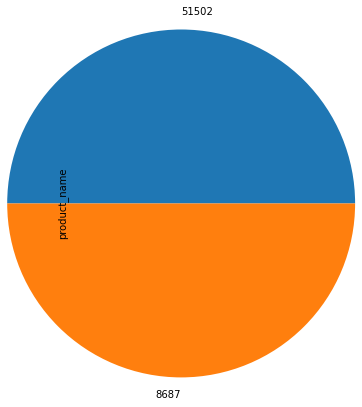

In [30]:
#j'affiche les valeurs doubles dans la colonne product_name
valeurs_doubles_product_name = df_nutri_score_fr['product_name'].duplicated().value_counts()
valeurs_doubles_product_name.value_counts().plot(kind='pie',radius=2);

In [31]:
#Je mets à jour mon dataframe en supprimant les valeurs doubles
df_nutri_score_fr = df_nutri_score_fr.drop_duplicates(subset="product_name")


In [32]:
#les valeurs doubles dans la colonne 'produits' ont bien été supprimés
df_nutri_score_fr['product_name'].duplicated().value_counts()

False    51502
Name: product_name, dtype: int64

# JE TRAITE LES VALEURS ABERRANTES  (<0, >100, Somme > 100)


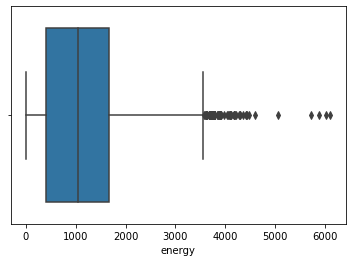

In [34]:
ax = sns.boxplot(x=df_nutri_score_fr['energy'])

In [35]:
df_nutri_score_sugar = df_nutri_score_fr[(df_nutri_score_fr['sugar'] >= 0) & (df_nutri_score_fr['sugar'] <= 100)]
#df_nutri_score[df_nutri_score.sugar < 100]

In [36]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_sugar.shape

(51501, 10)

Je choisir 4000kj pour le max pour me référer aux calories d'une huile. Aliment qui me semble le plus calorique.

In [37]:
df_nutri_score_energy = df_nutri_score_sugar[(df_nutri_score_sugar['energy'] >= 0) & (df_nutri_score_sugar['energy'] <= 4000)]

In [38]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_energy.shape

(51473, 10)

In [39]:
df_nutri_score_fiber = df_nutri_score_energy[(df_nutri_score_energy['fiber'] >= 0) & (df_nutri_score_energy['fiber'] <= 100)]

In [40]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_fiber.shape

(51465, 10)

In [41]:
df_nutri_score_protein = df_nutri_score_fiber[(df_nutri_score_fiber['protein'] >= 0) & (df_nutri_score_fiber['protein'] <= 100)]

In [42]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_protein.shape

(51464, 10)

In [43]:
df_nutri_score_sodium = df_nutri_score_protein[(df_nutri_score_protein['sodium'] >= 0) & (df_nutri_score_protein['sodium'] <= 100)]

In [44]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_sodium.shape

(51464, 10)

In [45]:
df_nutri_score_saturated_fat = df_nutri_score_sodium[(df_nutri_score_sodium['saturated_fat'] >= 0) & (df_nutri_score_sodium['saturated_fat'] <= 100)]

In [46]:
#je visualise à chaque étape mon nombre de valeurs pour ne pas faire de fausses manipulations
df_nutri_score_saturated_fat.shape

(51464, 10)

In [47]:
#j'écrase mon tableau sur la dernière version mise à jour
df_nutri_score_fr = df_nutri_score_saturated_fat

In [48]:
#Je compare le nombre de valeurs avec df_nutri_score_saturated_fat pour voir si mon nombre de valeurs est identique
df_nutri_score_fr.shape

(51464, 10)

In [49]:
df_nutri_score_fr.head(10)

,product_name,energy,sugar,fiber,protein,sodium,saturated_fat,nutrition_score,nutrition_echelon,distribution
185,Root Beer,215.0,13.6,0.0,0.0,0.024200,0.0,18.0,e,France
193,Preparation mug cake chocolat-caramel au beurr...,1632.0,42.0,0.0,7.0,0.383858,4.5,21.0,e,France
194,Mini Confettis,1753.0,87.7,0.9,0.6,0.003937,0.8,14.0,d,France
195,Praliné Amande Et Noisette,2406.0,50.3,3.9,9.5,0.001181,2.9,14.0,d,France
231,"Pepsi, Nouveau goût !",177.0,10.4,0.0,0.0,0.010000,0.0,13.0,e,France
240,Crêpes jambon fromage,678.0,3.7,0.9,8.2,0.287402,1.7,0.0,b,France
242,Tarte Poireaux Et Lardons,1079.0,1.0,1.4,7.5,0.314961,11.0,15.0,d,France
248,Marmite Original Pate A Tartiner 125G,1046.0,1.0,3.5,39.0,3.858268,0.1,9.0,c,France
251,Madeleines nature,1900.0,26.0,1.5,6.0,0.259843,2.5,12.0,d,France
288,Cakes Raisins,1768.0,28.0,1.8,5.8,0.255906,2.5,13.0,d,France


In [50]:
df_nutri_score_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51464 entries, 185 to 356005
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       51464 non-null  object 
 1   energy             51464 non-null  float64
 2   sugar              51464 non-null  float64
 3   fiber              51464 non-null  float64
 4   protein            51464 non-null  float64
 5   sodium             51464 non-null  float64
 6   saturated_fat      51464 non-null  float64
 7   nutrition_score    51464 non-null  float64
 8   nutrition_echelon  51464 non-null  object 
 9   distribution       51464 non-null  object 
dtypes: float64(7), object(3)
memory usage: 4.3+ MB
